# Project 2: Ames Housing Data and Kaggle Challenge

Embarking on this project follows two-prongs:
- First, the exploratory understanding and modelling of various predictor variables in the Ames Housing Data set in predicting Sale Price
- Secondly, the submission of the results for a privately hosted Kaggle Challenge



# 1. Problem Statement


Property prices are often subject to fluctuations due to a plethora of reasons. Understanding the underlying contributions of various factors that shape property pricing would be highly insightful. Therefore, **the aim of this project is to predict house prices in using regression models.** Specifically, the housing data of Ames,Iowa would be used for the scope of the project. 

In this project, I attempted to train an as accurate a model as possible for predicting house prices in Ames, using regression techniques, feature engineering, feature selection, and regularization. 

## 1.1 Why is this important?

The data set used contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. Understanding the relationship between the variables recorded and the sale price would be pivotal in isolating key variables that contribute to sale price. While the findings may be inconclusive, they may be used to inform future decisions regarding data collection and house pricing related decisions.

For example, given further enhancements, the Ames Assessor's Office would be able to use the model to assess the value of housing in Ames, and property agents may be able to use the model as a tool to validate the fairness of the pricing of the property.

Specifically, property agents may use this model to advise their clients on the 'fair market value' (based on past data inserted into the model) of property Sale Price in Ames. In a less direct sense, somewhere down the line, the model may also be used as a planning tool for building projects to estimate the variables that are important.


## 1.2 Success evaluation

The success of this project would be evaluated by obtaining the best score for the regression model trained.  When training the model, the R squared score would be used as the scoring metric. The higher the R squared, the better the model. The dataset used for prediction would be the withheld test set available on Kaggle. However, because the Kaggle competition is scored using the Root Mean Squared Error, it would make sense to have certain measurements of this metrics in our evaluation of the model. 

Ultimately, the R squared score and RMSE are similar in the way that they both are metrics that reflect the residuals of the model, and is hence used to explain the variance of our model's prediction.

In [1]:
#Import libraries for use

import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# 2. Data Cleaning and Exploratory Data Analysis

In [2]:
train = pd.read_csv("../datasets/train.csv")

In [3]:
#The dataset has 2051 properties, and 81 variables(inclusive of target variable, SalePrice)
train.shape

(2051, 81)

## 2.1 Summary Statistics

Understanding the rough range in which our variables will operate within is useful in exploring the data. As such, I will have a brief look at certain variables of interest and call out any useful information to the project.

In [4]:
#I use the set_option function to make the columns window huge enough to read all columns
#Describe function shows the numberical statistical distribtuion of the various variables 
pd.set_option('max_columns',82)
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Out of a total of 81 columns of potential predictor variables, 39 columns are included in the summary statistics. This means that qualitative variables exist, and that data manipulation would be necessary to convert them to integers/floats before embarking on the modelling process.

Of interest is our target variable of SalePrice, which is the key variable we want to predict. Here are some of the key findings regarding this variable:
- Mean SalePrice of 181469
- Min SalePrice of 12,789
- Max SalePrice of 611,657


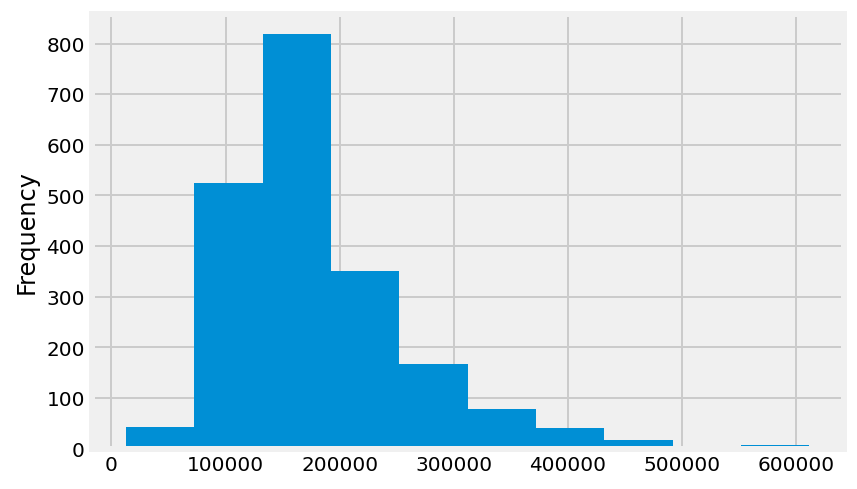

In [5]:
train['SalePrice'].plot(kind = 'hist')

The histogram above shows the distribution of SalePrice, and the frequency in which values in each value range occurs. Taken at a big picture level, it appears that while the value of SalePrice can range from 10,000 to 600,000, most of it occurs in the 100,000 to 200,000 range. Speaking from the perspective of the concentration of data, this could mean that we have alot more data that would accurately predict the lower range of prices, and fewer data to predict the higher end prices.

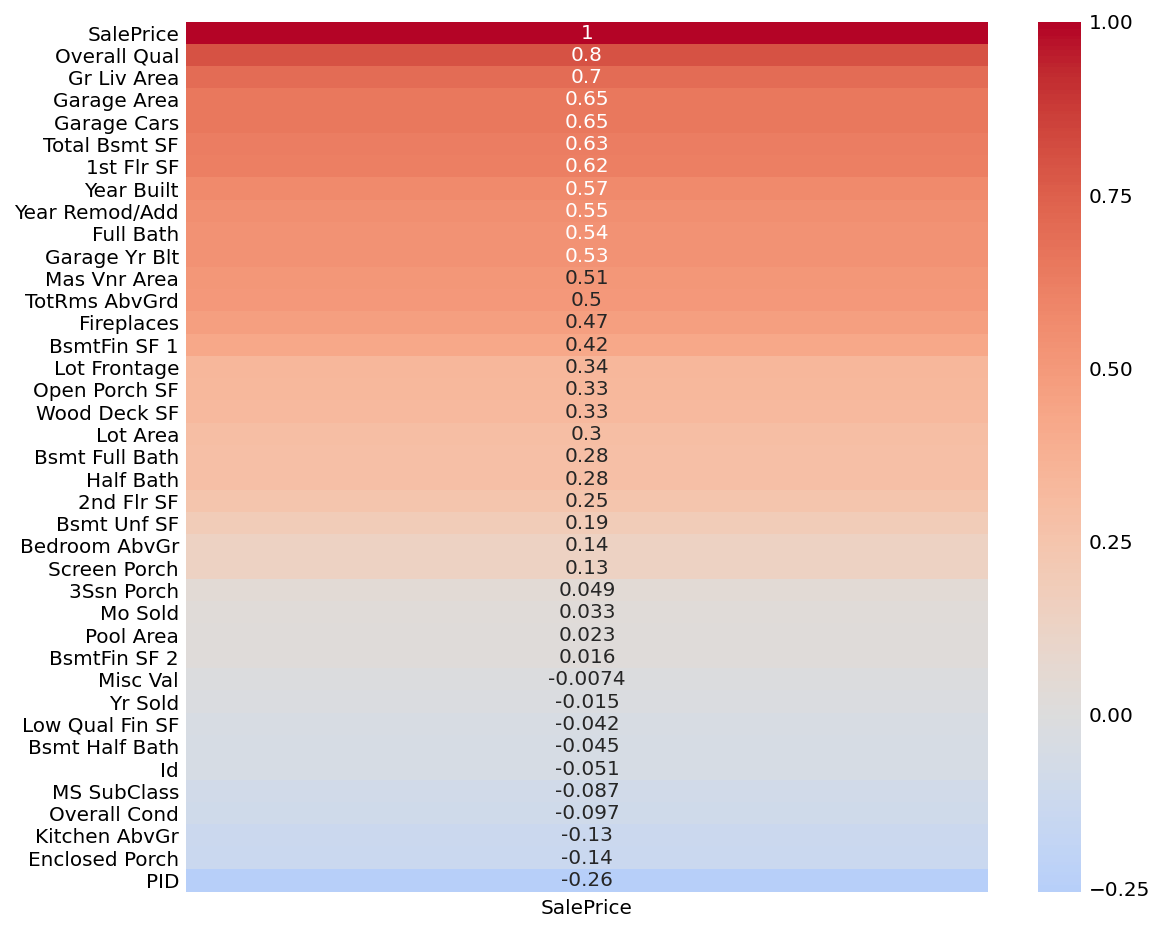

In [6]:
figure = plt.figure(figsize=(8,8))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice',ascending=False),annot=True, cmap='coolwarm', center=0);

Prior to any manipulation of data, we see the correlation heatmap between the quantitative predictor variables and the target variable SalePrice. It appears that the top 3 positively correlated variables are:
- Overall qual
- Gr Living Area
- Garage Area

Mostly space related variables, which is unsurprising given that people would usually pay a premium for bigger space. One thing to note, is that the variables that are more positively correlated to SalePrice is more likely to be the bigger contributor in our regression model.

In [7]:
#Get a sense of the values of the dataset

train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


At this point, I checked the non-null values in the dataset, as well as the datatypes using the train.info() function. Some key facts to note: 
- The data description states that: "The data has 82 columns which include 
23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers)."
- I assigned the variable type from the data description on top what was provided as follows:


There are 4 main types of data that will be handled:
- Nominal: Unordered categorical variables. Will have to create numerical dummies ( Yes:1 , No:0 ) in order to include in the model
- Ordinal: Ordered categorical variables. Will have to create ordered numerical dummies that reflect the magnitude of the response (eg. -2 for bad, 0 for neutral, 2 for good)
- Discrete: Numerical integers that are in set intervals
- Continuous: Numerical integers that can be found in a range

## 2.2 Processing nominal variables

The nominal variables can be split into two main types:
- Those without null values:


- Those with null values, which are to be processed:

### 2.2.1 Masonry Veneer Type data imputation

In [8]:
#The count of houses with Masonry veneers
#Note that most of the houses do not have one
train['Mas Vnr Type'].value_counts(dropna=False)

None       1218
BrkFace     630
Stone       168
NaN          22
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [9]:
#I include 'Mas Vnr Area' in processing even though it is a continuous variable, as I believe them to be  
#highly related: without a Masonry Veneer, you will not have a Masonry Veneer Area
#Note that most of the houses have 0.0 for this variable
train['Mas Vnr Area'].value_counts(dropna=False)

0.0       1216
NaN         22
120.0       11
200.0       10
176.0       10
          ... 
468.0        1
235.0        1
362.0        1
199.0        1
1095.0       1
Name: Mas Vnr Area, Length: 374, dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
#Impute NaN values with the most frequent value. None for Mas Vnr Type, 0.0 for Mas Vnr Area
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train.loc[:,"Mas Vnr Type":"Mas Vnr Area"] = imp1.fit_transform(train.loc[:,"Mas Vnr Type":"Mas Vnr Area"])


I decided to impute the missing values for 'Mas Vnr Type' and 'Mas Vnr Area' with the mode. Since most of the other data in other columns exists, I suspect it is unlikely that the missing value stems from a failed data collection. Seeing that most of the houses did not have a Masonry Veneer, I decided to impute the mode on all the missing values.

### 2.2.2 Alley data imputation

In [12]:
train.Alley.value_counts(dropna=False)

NaN     1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

As the data description mentions that 3 categories are present: Grvl, Pave, and NA, I suspect that the NaN values were synonymous with the NA value present in the data description, which stands for 'No Alley access'. As such, I will impute all null values with 'NA'.

In [13]:
#Impute NaN values with the value 'None':'No alley access'
imp2 = SimpleImputer(missing_values=np.nan, fill_value='None', strategy='constant')
train.loc[:,"Alley"] = imp2.fit_transform(train['Alley'].values.reshape(-1,1))


In [14]:
train.Alley.value_counts()

None    1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

### 2.2.3 Garage Type imputation

In [15]:
#Check current 'Garage Type' count of each value
train['Garage Type'].value_counts(dropna=False)

Attchd     1213
Detchd      536
BuiltIn     132
NaN         113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

Similar to the variable 'Alley', the data description clearly mentions that one of the categorical values of 'Garage Type' should be 'NA' which stands for: No Garage. However, since it is not reflected here, I suspect that the NaN values actually refer to NA--No Garage

In [16]:
#Impute NaN values with the value 'NA':'No Garage'
#I apply imp2 (previously instantiated) to transform 'Garage Type'
train.loc[:,"Garage Type"] = imp2.fit_transform(train['Garage Type'].values.reshape(-1,1))

In [17]:
#Successful imputed NaN values with 'NA'
train['Garage Type'].value_counts(dropna=False)

Attchd     1213
Detchd      536
BuiltIn     132
None        113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

### 2.2.4 Misc Feature imputation

In [18]:
#Show the proportion of missing values 
train['Misc Feature'].value_counts(dropna=False)

NaN     1986
Shed      56
Gar2       4
Othr       3
Elev       1
TenC       1
Name: Misc Feature, dtype: int64

Similar to the variables 'Garage Type' and 'Alley', the data description clearly mentions that one of the categorical values of 'Misc Feature' should be 'NA' which stands for: None. However, since it is not reflected here, I suspect that the NaN values actually refer to NA--None(No misc features).

In [19]:
#Impute NaN values with the value 'NA':'None'
#I apply imp2 (previously instantiated) to transform 'Misc Feature'
train.loc[:,"Misc Feature"] = imp2.fit_transform(train['Misc Feature'].values.reshape(-1,1))

In [20]:
#Nan values successfully imputed with 'NA'
train['Misc Feature'].value_counts(dropna=False)

None    1986
Shed      56
Gar2       4
Othr       3
Elev       1
TenC       1
Name: Misc Feature, dtype: int64

## 2.3 Processing ordinal variables

The ordinal variables can be broadly split into two categories:
- variables without null values


In [21]:
train['Lot Shape'].isnull().sum()

0

- variables with null values

The tricky thing about creating dummy variables for ordinal variables, is that it can be subjective (eg. no basement is worse than a poor basement). As such, these ordered variables will in general be assigned a range of integers [-2,-1,0,1,2] whereby a positive score denotes a more favorable trait, and vice versa for a negative score.

In variables where there appears to be no real negative(or positive) responses, a non-negative(or non-positive) range
can be used to approximate the relationship of the variable (eg. [0,1,2,3] or [-3,-2,-1,0])

Lastly, in my opinion, the weightage of the extreme ends of the variables can be allocated a higher value. (eg.[-5,-2,0,2,5] instead of [-2,-1,0,1,2])

### 2.3.1 Basement-related imputation of missing data

In [22]:
#Among the null values in 'Bsmt Exposure', 55 of them are overlaps with 4 other columns
train[train['Bsmt Exposure'].isnull()].loc[:,'Bsmt Qual':'Total Bsmt SF'].isnull().sum()

Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    55
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
dtype: int64

In [23]:
#Confirmation that 55 rows of data are 'No Basement', 3 rows of data has an unaccounted for NaN for Bsmt Exposure
train[train['Bsmt Exposure'].isnull()].loc[:,'Bsmt Qual':'Total Bsmt SF']

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [24]:
#A look at the 3 rows that contain missing value for Bsmt Exposure.
train.iloc[[1456,1547,1997],:]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1456,1797,528458090,60,FV,81.0,10411,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,None,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,None,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,None,0,2,2006,WD,192500


Looking at the data, it appears that most of the columns have similar missing values for 55 rows. Referring to the Data Description, it reveals that a value 'NA': No Basement was not included in our analysis. As such, I suspect that missing values are actually indicative of a property with no basement for these 55 rows. A simple imputation of NA: No Basement to these missing values should suffice.

However, 'Bsmt Exposure' stands out, having yet another 3 rows (index 1456,1547,1997) with missing values after accounting for the 55 no basement values. I would therefore have to decide between removing these data, or imputing values to them.

Taking into consideration to keep imputation to the minimum where possible, and considering the small size of the dataset, I decide to drop these 3 rows from the dataset. 

In [25]:
#I drop the 3 unaccounted for missing values from Bsmt Exposure
train.drop(index=[1456,1547,1997],inplace=True)

Next, we deal with the 1 unaccounted missing value from BsmtFin Type 2

In [26]:
train['BsmtFin Type 2'].value_counts(dropna=False)

Unf    1746
Rec      80
LwQ      60
NaN      56
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [27]:
#BsmtFin Type 2 has 1 additional Nan value compared to the baseline of 55
train[train['BsmtFin Type 2'].isnull()].loc[:,'Bsmt Qual':'Total Bsmt SF']

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


It appears that BsmtFin Type 2 has an additional missing value compared to the baseline. As I would prefer to not impute values unless truly necessary, I decide to drop this one row of data due to its minute size. 

In [28]:
train.drop(index=[1147],inplace=True)

In [29]:
train.shape

(2047, 81)

Next, I impute the missing values with 'NA' for all of the aforementioned basement related columns

In [30]:
basement = train.loc[:,['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']]

In [31]:
#Impute NaN values with the value 'NA':'No Basement'
#I apply imp2 (previously instantiated) to transform 
#'Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1' and 'BsmtFin Type 2'
train.loc[:,['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']] = imp2.fit_transform(basement)

In [32]:
#Nan values successfully converted to NA values
train['Bsmt Qual'].value_counts()

TA      887
Gd      860
Ex      184
Fa       60
None     55
Po        1
Name: Bsmt Qual, dtype: int64

In [33]:
#I check to make sure that there are no more NaN values
train[train['BsmtFin Type 2'].isnull()].loc[:,'Bsmt Qual':'Total Bsmt SF']

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF


### 2.3.2 Fireplace imputation of missing data

In [34]:
#There are 999 properties with 0 fireplaces
train['Fireplaces'].value_counts(dropna=False)

0    999
1    895
2    146
3      6
4      1
Name: Fireplaces, dtype: int64

In [35]:
#There is a corresponding 999 missing values. As such, it is highly likely that the missing values are already 'NA'
#values: No Fireplace
train['Fireplace Qu'].value_counts(dropna=False)

NaN    999
Gd     521
TA     406
Fa      59
Po      31
Ex      31
Name: Fireplace Qu, dtype: int64

In [36]:
#Impute NaN values with the value 'NA':'No Fireplace'
#I apply imp2 (previously instantiated) to transform 'Garage Type'
train.loc[:,"Fireplace Qu"] = imp2.fit_transform(train['Fireplace Qu'].values.reshape(-1,1))

In [37]:
#I confirm that the NaN values are replaced with NA
train.loc[:,"Fireplace Qu"].value_counts(dropna=False)

None    999
Gd      521
TA      406
Fa       59
Po       31
Ex       31
Name: Fireplace Qu, dtype: int64

### 2.3.3 Garage imputation of missing data

In [38]:
#I check and realise that all 3 variables hold the same number of missing values:
train[['Garage Finish','Garage Qual','Garage Cond']].isnull().sum()

Garage Finish    114
Garage Qual      114
Garage Cond      114
dtype: int64

In [39]:
#I ascertain that there are 114 rows where all 3 variables have missing values
#Since the data description mentions that there are responses called NA which denote 'No Garage'
#I suspect that the missing values are NA responses
train[train['Garage Finish'].isnull() & train['Garage Qual'].isnull() & train['Garage Cond'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,None,None,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,None,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,None,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,None,None,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,None,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,None,None,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NaN,NaN,None,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,None,None,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,None,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,None,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,None,None,NaN,NaN,0.0,0.0,NaN,NaN,Y,128,0,0,0,0,0,NaN,NaN,None,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,None,None,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,NaN,NaN,None,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,None,None,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,Na

In [40]:
garage = train.loc[:,['Garage Finish','Garage Qual','Garage Cond']]

In [41]:
#Impute NaN values with the value 'NA':'No Garage'
#I apply imp2 (previously instantiated) to transform 
#'Garage Finish','Garage Qual','Garage Cond'
train.loc[:,['Garage Finish','Garage Qual','Garage Cond']] = imp2.fit_transform(garage)

In [42]:
#No Nan values remaining among garage ordinal variables
train[train['Garage Finish'].isnull() & train['Garage Qual'].isnull() & train['Garage Cond'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


### 2.3.4 Pool imputation of missing data

In [43]:
#There 2038 missing values
train['Pool QC'].value_counts(dropna=False)

NaN    2038
Gd        4
Fa        2
TA        2
Ex        1
Name: Pool QC, dtype: int64

In [44]:
#There are 2038 'pools' with 0 area, which means that the 2038 missing values are in fact nonexistent pools
train['Pool Area'].value_counts(dropna=False)

0      2038
800       1
738       1
648       1
576       1
561       1
519       1
480       1
368       1
228       1
Name: Pool Area, dtype: int64

In [45]:
#Impute NaN values with the value 'NA':'No pool' (in accordance to the data description)
#I apply imp2 (previously instantiated) to transform 'Garage Type'
train.loc[:,"Pool QC"] = imp2.fit_transform(train['Pool QC'].values.reshape(-1,1))

In [46]:
#I confirm that null values are imputed with 'NA'
train['Pool QC'].value_counts(dropna=False)

None    2038
Gd         4
Fa         2
TA         2
Ex         1
Name: Pool QC, dtype: int64

### 2.3.5 Fence imputation of missing data

In [47]:
#The data description mentioned a value NA: No fence, which is not shown here. As such, I suspect that the 
#Missing values could be the NA values.
train['Fence'].value_counts(dropna=False)

NaN      1647
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

In [48]:
#Impute NaN values with the value 'NA':'No fence' (in accordance to the data description)
#I apply imp2 (previously instantiated) to transform 'Fence'
train.loc[:,"Fence"] = imp2.fit_transform(train['Fence'].values.reshape(-1,1))

In [49]:
#Check that null values are successfully imputed with NA values
train['Fence'].value_counts(dropna=False)

None     1647
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

### 2.3.6 Imputation of Ordinal variables into numbers

The following 21 ordinal variables are to be imputed with a numerical number. The numbers are linked to how positive/negative the response is. eg. 5 for excellent, 2 for good, -5 for poor. 

Some variables may not have negative values, as the responses are determined to be additional features on top of a baseline(good to have). eg. Pool Quality

Some variables may not have positive values, as the responses are determined to be a sequential deterioration eg. Functional(the house possessing typical functionalities)



In [50]:
train['Lot Shape'] = train['Lot Shape'].map({'Reg':2,'IR1':1,'IR2':0,'IR3':-1})

In [51]:
train['Utilities'] = train['Utilities'].map({'AllPub':2,'NoSewr':1,'NoSeWa':0})

In [52]:
#Most properties are flat, so i penalize for slopes/severe slopes
train['Land Slope'] = train['Land Slope'].map({'Gtl':0,'Mod':-1,'Sev':-2})

In [53]:
#The next four variables follow the same rating system according to the data description
#I give higher weight to the extreme variables, as they will likely have bigger influence
train['Exter Qual'] = train['Exter Qual'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-2,'Po':-5})
train['Exter Cond'] = train['Exter Cond'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-2,'Po':-5})
train['Heating QC'] = train['Heating QC'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-2,'Po':-5})
train['Kitchen Qual'] = train['Kitchen Qual'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-2,'Po':-5})


In [54]:
train['Bsmt Qual'] = train['Bsmt Qual'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-1,'Po':-2,'None':-5})
train['Bsmt Cond'] = train['Bsmt Cond'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-1,'Po':-2,'None':-5})

In [55]:
train['Bsmt Exposure'] = train['Bsmt Exposure'].map({'Gd':5,'Av':2,'Mn':0,'No':-2,'None':-5})

In [56]:
#These two variables follow the same rating system according to the data description
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map({'GLQ':5,'ALQ':2,'BLQ':1,'Rec':0,'LwQ':-1,'Unf':-2,'None':-5})
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map({'GLQ':5,'ALQ':2,'BLQ':1,'Rec':0,'LwQ':-1,'Unf':-2,'None':-5})

In [57]:
train['Electrical'] = train['Electrical'].map({'SBrkr':5,'FuseA':2,'FuseF':0,'FuseP':-2,'Mix':-5})

In [58]:
train['Electrical'].isnull().sum()

0

In [59]:
#I weigh negative factors more heavily as I believe home owners expect typical functionality to be present
train['Functional'] = train['Functional'].map({'Typ':3,'Min1':2,'Min2':1,'Mod':0,'Maj1':-1,'Maj2':-2,'Sev':-5,'Sal':-8})


In [60]:
#These two variables follow the same rating system according to the data description
train['Fireplace Qu'] = train['Fireplace Qu'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-1,'Po':-2,'None':-5})
train['Garage Qual'] = train['Garage Qual'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-1,'Po':-2,'None':-5})
train['Garage Cond'] = train['Garage Cond'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-1,'Po':-2,'None':-5})

In [61]:
#I did not include 0 as I do not consider any of the response neutral
train['Garage Finish'] = train['Garage Finish'].map({'Fin':5,'RFn':2,'Unf':-2,'None':-5})

In [62]:
train['Paved Drive'] = train['Paved Drive'].map({'Y':3,'P':0,'N':3})

In [63]:
#I consider pools to be a luxury item, and hence the scales are 
#largely positive
train['Pool QC'] = train['Pool QC'].map({'Ex':6,'Gd':3,'TA':2,'Fa':1,'None':0})


In [64]:
train['Fence'] = train['Fence'].map({'GdPrv':5,'MnPrv':2,'GdWo':1,'MnWw':-1,'None':-3})

## 2.4 Imputation of continuous variables

The following is a list of the continuous variables(before processing), of which some are missing values. Mas Vnr Area has already been processed with Mas Vnr Type, and hence will be excluded at this step. 

As such, most of them can be used as is, and I will process only the variables that are missing values:

### 2.4.1 Lot Frontage Imputation

In [65]:
train["Lot Frontage"].value_counts(dropna=False)

NaN      330
60.0     179
70.0      96
80.0      94
50.0      90
        ... 
141.0      1
135.0      1
155.0      1
33.0       1
137.0      1
Name: Lot Frontage, Length: 119, dtype: int64

In [66]:
train["Lot Frontage"].describe()

count    1717.000000
mean       69.039022
std        23.282375
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [67]:
#As there are significant numbers of missing values, it would not make sense to impute 0 as a value, as
#It would skew the data. As such, I decide to Impute the missing values with the mean of the variable
#Impute NaN values with the value 69.0 (mean of the variable)
imp3 = SimpleImputer(missing_values=np.nan, fill_value=69.0, strategy='constant')
train.loc[:,"Lot Frontage"] = imp3.fit_transform(train['Lot Frontage'].values.reshape(-1,1))

In [68]:
#ascertain that mean value has been imputed
train["Lot Frontage"].value_counts(dropna=False)

69.0     344
60.0     179
70.0      96
80.0      94
50.0      90
        ... 
195.0      1
141.0      1
135.0      1
33.0       1
137.0      1
Name: Lot Frontage, Length: 118, dtype: int64

### 2.4.2 Basement Imputation

In [69]:
#It appears that the missing values among these 4 variables all come from the same property
train[train['BsmtFin SF 1'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,None,1,Lvl,2,FR3,0,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,0,0,PConc,-5,-5,-5,-5,NaN,-5,NaN,NaN,NaN,GasA,0,Y,2,896,0,0,896,NaN,NaN,1,0,2,1,0,4,3,0,-5,Detchd,1946.0,-2,1.0,280.0,0,0,3,0,0,0,0,0,0,0,2,None,0,4,2008,ConLD,79000


In [70]:
#I decide to drop the row as it is only a single row, and I do not want to impute values where possible
train.drop(index=[1327],inplace=True)

In [71]:
#Row successfully dropped
train[train['BsmtFin SF 1'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


### 2.4.3 Garage Imputation

In [72]:
train['Garage Area'].isnull().sum()

1

In [73]:
train[train['Garage Area'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,None,2,Lvl,2,Inside,0,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,0,0,BrkTil,2,0,-2,2,548.0,-2,0.0,311.0,859.0,GasA,5,Y,5,942,886,0,1828,0.0,0.0,2,0,3,1,2,6,3,0,-5,Detchd,NaN,-5,NaN,NaN,-5,-5,3,174,0,212,0,0,0,0,2,None,0,3,2007,WD,150909


In [74]:
#I decide to drop the row as it is only a single row, and I do not want to impute values where possible
train.drop(index=1712,inplace=True)

In [75]:
#Ascertain that the row is dropped
train[train['Garage Area'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


## 2.5 Imputation of discrete variables

The discrete variables can be split into two categories:
- Those without null values:

- And those with null values:

First, I will work on imputing the missing values that are found in the above 4 variables

### 2.5.1 Basement-related imputation

In [76]:
train['Bsmt Full Bath'].value_counts(dropna=False)

0.0    1196
1.0     823
2.0      23
3.0       2
NaN       1
Name: Bsmt Full Bath, dtype: int64

In [77]:
#As it appeears that for both these variables there are no basements in the house, I will impute the number of baths
#As 0.0 instead.
train[train['Bsmt Full Bath'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,None,1,Lvl,2,Inside,0,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,0,0,Slab,-5,-5,-5,-5,0.0,-5,0.0,0.0,0.0,GasA,0,Y,5,3820,0,0,3820,NaN,NaN,3,1,5,1,5,11,3,2,2,Attchd,1959.0,-2,2.0,624.0,0,0,3,0,372,0,0,0,0,0,-3,None,0,7,2008,WD,284700


In [78]:
#I impute the NaN value with 0.0
#I apply imp(previously instantiated) to replace 
imp4 = SimpleImputer(missing_values=np.nan, fill_value=0.0, strategy='constant')
train.loc[:,"Bsmt Full Bath":"Bsmt Half Bath"] = imp4.fit_transform(train.loc[:,"Bsmt Full Bath":"Bsmt Half Bath"])

In [79]:
#I ascertain that the NaN values are replaced
train[train['Bsmt Full Bath'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


### 2.5.2 Garage-related imputation

In [80]:
train['Garage Yr Blt'].value_counts(dropna=False)

NaN       113
2005.0    104
2007.0     83
2006.0     80
2004.0     72
         ... 
1917.0      1
1919.0      1
1895.0      1
1896.0      1
2207.0      1
Name: Garage Yr Blt, Length: 101, dtype: int64

In [81]:
train['Garage Yr Blt'].sort_values(ascending=False)

1699    2207.0
144     2010.0
1241    2010.0
1732    2009.0
1796    2009.0
         ...  
1991       NaN
2010       NaN
2027       NaN
2039       NaN
2042       NaN
Name: Garage Yr Blt, Length: 2045, dtype: float64

In [82]:
#I suspect that the garage year built of 2207 is in fact a typo, and should instead be 2007
#As such, I will replace it with 2007
train[train['Garage Yr Blt'] > 2010]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,2261,916384070,20,RL,68.0,8298,Pave,None,1,HLS,2,Inside,0,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,0.0,2,0,PConc,2,0,2,5,583.0,-2,0.0,963.0,1546.0,GasA,5,Y,5,1564,0,0,1564,0.0,0.0,2,0,2,1,5,6,3,1,2,Attchd,2207.0,2,2.0,502.0,0,0,3,132,0,0,0,0,0,0,-3,None,0,9,2007,New,267300


In [83]:
train['Garage Yr Blt'].replace(2207, 2007,inplace=True)

In [84]:
#Check to ascertain that the replacement is done
train[train['Garage Yr Blt'] > 2010]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [85]:
train['Garage Yr Blt'].mean()

1978.5683229813665

In [86]:
train['Garage Yr Blt'].isnull().sum()

113

In [87]:
#As done previously for the variables 'Garage Cond' and 'Garage Qual', it appears that the missing values signify
#That there is actually no garage. As such, for representation sake, I will impute the 'Garage Yr Blt' null values with
#The average of the year that was built - 1978

train['Garage Yr Blt'].fillna(1978,inplace=True)

### 2.5.3 One-hot encoding the nominal variables

The following are the nominal variables to be one-hot encoded:

In [88]:
#Prepare pandas to be able to view all the columns after one-hot encoding
pd.set_option('max_columns',250)

#One-hot encode the non-null nominal variables
train = pd.get_dummies(train, columns=["MS SubClass",
                                         "MS Zoning",
                                         "Street",
                                         "Land Contour",
                                         "Lot Config",
                                         "Neighborhood",
                                         "Condition 1",
                                         "Condition 2",
                                         "Bldg Type",
                                         "House Style",
                                         "Roof Style",
                                         "Roof Matl",
                                         "Exterior 1st",
                                         "Exterior 2nd",
                                         "Foundation",
                                         "Heating",
                                         "Central Air",
                                         "Sale Type",
                                         "Alley",
                                         "Mas Vnr Type",
                                         "Garage Type",
                                         "Misc Feature"],
                       )


In [89]:
#After cleaning and one-hot encoding, I have 213 variables(including target variable)
train.shape

(2045, 235)

In [90]:
#All the dataset for the training data has been cleaned
train.isnull().sum().sum()

0

In [91]:
train['Lot Shape']

0       1
1       1
2       2
3       2
4       1
       ..
2046    1
2047    1
2048    2
2049    2
2050    2
Name: Lot Shape, Length: 2045, dtype: int64

## 2.6 Relating our findings to the problem statement

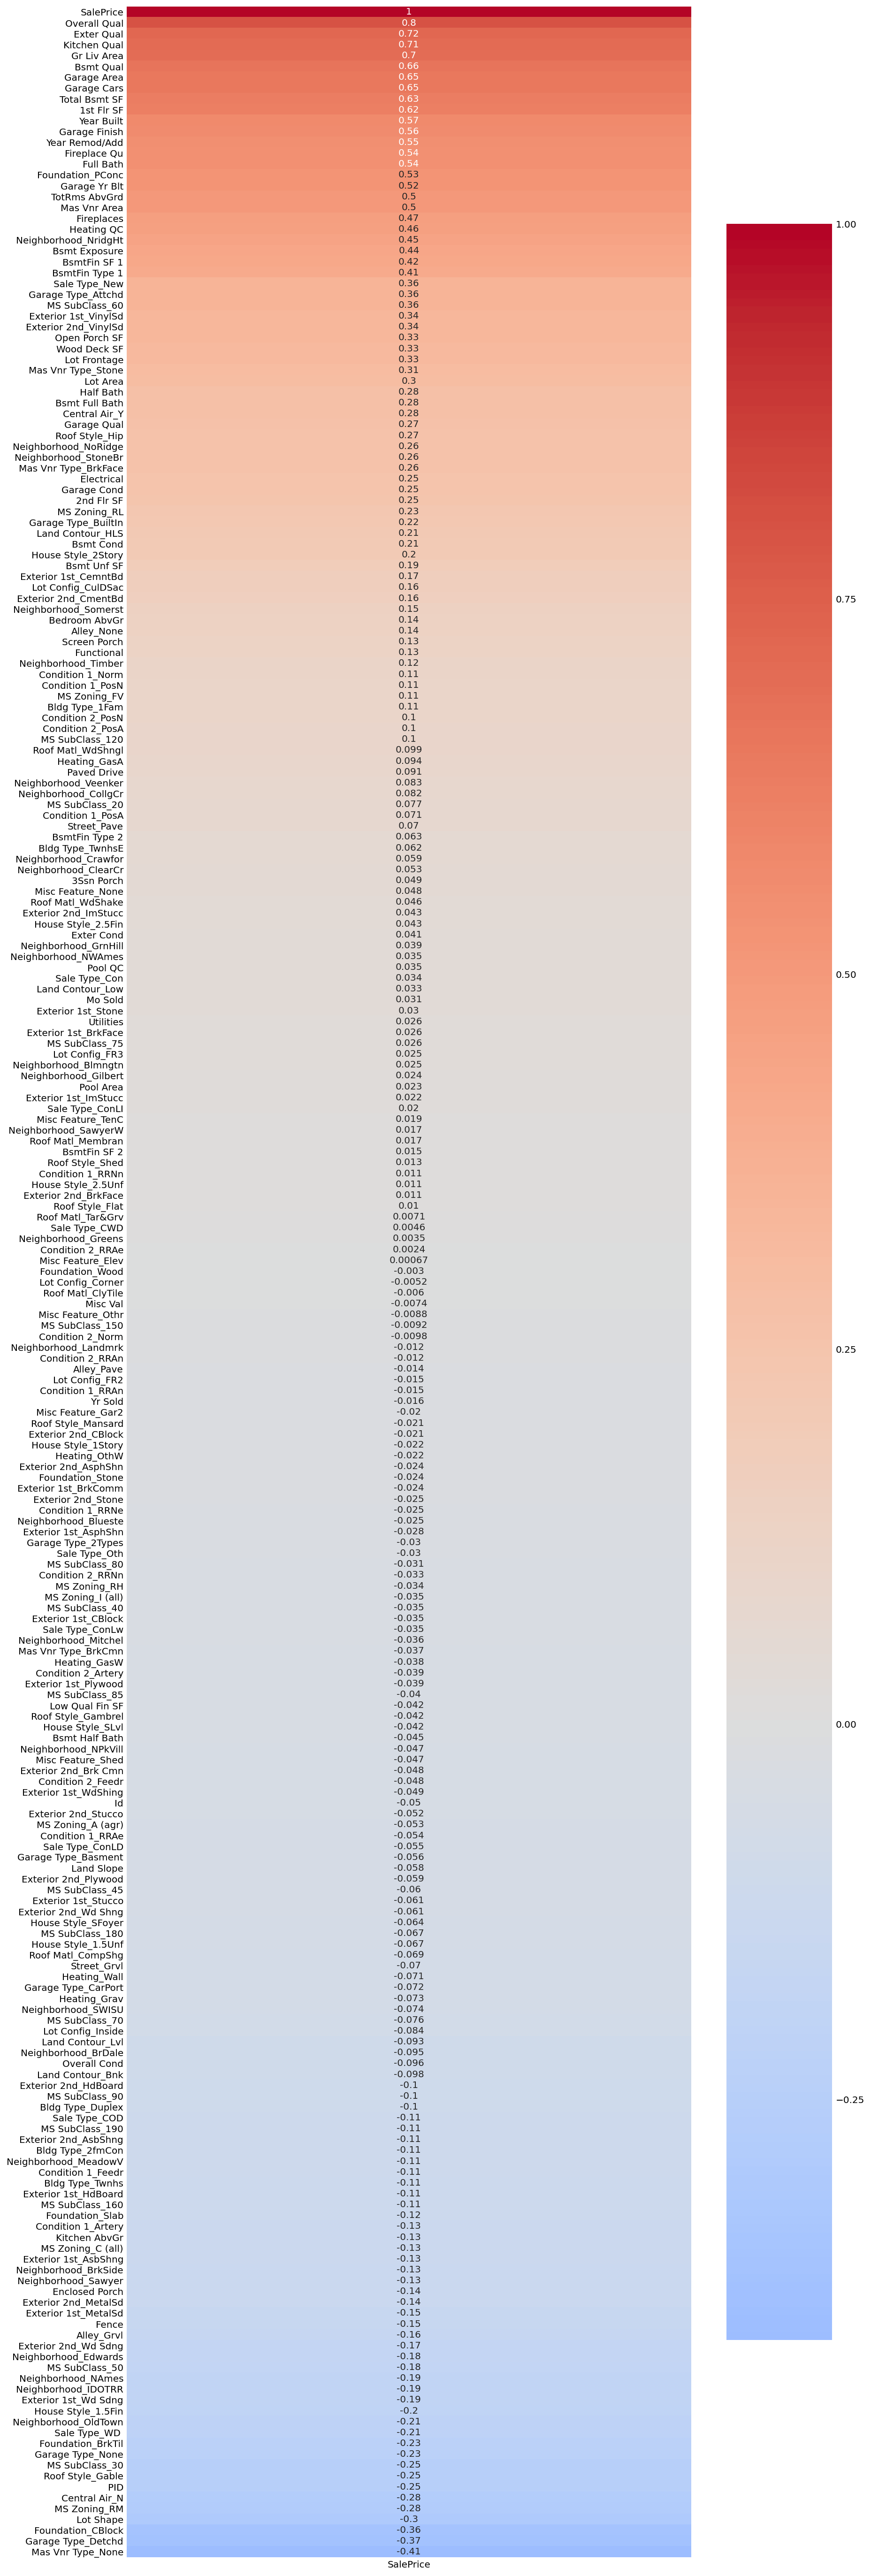

In [92]:
#A heat map showing the correlation between my X variables and target variable
figure = plt.figure(figsize=(12,50))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice',ascending=False),annot=True, cmap='coolwarm', center=0);

In [93]:
train.shape

(2045, 235)

So far, after encoding the various variables with numerical data, the heatmap shows a good range of variables and their respective correlation. There appears to be a few significant variables with negative correlation, such as "Foundation_CBlock","Garage_Type_Detchd", and "Mas Vnr Type_None". This is good for the modelling, as it would be useful to find out variables that may negatively affect Sale Price.

The amount of missing values is also not immense, and was successfully resolved with the various imputation methods that were previously outlined. As such, I am confident that we would be able to come up with a significant model that can estimate sale prices with the given and manipulated predictor variables.

# 3. Test set data cleaning and imputation

In order to run the model subsequently on the test set given, it is imperative to render the same transformation done to the train set, to the test set. 

## 3.1 Exploratory Data Analysis

In [94]:
#Load in the test set
test = pd.read_csv("../datasets/test.csv")

In [95]:
#Test has one less variable compared to the training set(minus target variable)
test.shape

(879, 80)

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [97]:
test.shape


(879, 80)

## 3.2 Test Data Imputation

The following are variables in the test set with null values that will need to undergo data imputation:

While the code block may suggest a simple linear process, the actual process of iterating through the data was gruelling and intensive. 

In [98]:
#Code to clean test set 
#Values that underwent imp3
imp3 = SimpleImputer(missing_values=np.nan, fill_value=69.0, strategy='constant')
test.loc[:,"Lot Frontage"] = imp3.fit_transform(test['Lot Frontage'].values.reshape(-1,1))

#Values that underwent imp2
imp2 = SimpleImputer(missing_values=np.nan, fill_value='None', strategy='constant')
test.loc[:,"Alley"] = imp2.fit_transform(test['Alley'].values.reshape(-1,1))
test.loc[:,"Garage Type"] = imp2.fit_transform(test['Garage Type'].values.reshape(-1,1))
test.loc[:,"Misc Feature"] = imp2.fit_transform(test['Misc Feature'].values.reshape(-1,1))
basement_test = test.loc[:,['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']]
test.loc[:,['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']] = imp2.fit_transform(basement_test)
test.loc[:,"Fireplace Qu"] = imp2.fit_transform(test['Fireplace Qu'].values.reshape(-1,1))
garage_test = test.loc[:,['Garage Finish','Garage Qual','Garage Cond']]
test.loc[:,['Garage Finish','Garage Qual','Garage Cond']] = imp2.fit_transform(garage_test)
test.loc[:,"Pool QC"] = imp2.fit_transform(test['Pool QC'].values.reshape(-1,1))
test.loc[:,"Fence"] = imp2.fit_transform(test['Fence'].values.reshape(-1,1))

#Values that underwent imp1
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test.loc[:,"Mas Vnr Type":"Mas Vnr Area"] = imp1.fit_transform(test.loc[:,"Mas Vnr Type":"Mas Vnr Area"])

#Values that underwent fillna:
test['Garage Yr Blt'].fillna(1978,inplace=True)
test['Electrical'].fillna('None',inplace=True)


In [99]:
#Prepare pandas to be able to view all the columns after one-hot encoding
pd.set_option('max_columns',250)

#One-hot encode the non-null nominal variables
test = pd.get_dummies(test, columns=["MS SubClass",
                                         "MS Zoning",
                                         "Street",
                                         "Land Contour",
                                         "Lot Config",
                                         "Neighborhood",
                                         "Condition 1",
                                         "Condition 2",
                                         "Bldg Type",
                                         "House Style",
                                         "Roof Style",
                                         "Roof Matl",
                                         "Exterior 1st",
                                         "Exterior 2nd",
                                         "Foundation",
                                         "Heating",
                                         "Central Air",
                                         "Sale Type",
                                         "Alley",
                                         "Mas Vnr Type",
                                         "Garage Type",
                                         "Misc Feature"],
                          
                      )


In [100]:
test['Lot Shape'] = test['Lot Shape'].map({'Reg':2,'IR1':1,'IR2':0,'IR3':-1})

test['Utilities'] = test['Utilities'].map({'AllPub':2,'NoSewr':1,'NoSeWa':0})

#Most properties are flat, so i penalize for slopes/severe slopes
test['Land Slope'] = test['Land Slope'].map({'Gtl':0,'Mod':-1,'Sev':-2})

#The next four variables follow the same rating system according to the data description
#I give higher weight to the extreme variables, as they will likely have bigger influence
test['Exter Qual'] = test['Exter Qual'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-2,'Po':-5})
test['Exter Cond'] = test['Exter Cond'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-2,'Po':-5})
test['Heating QC'] = test['Heating QC'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-2,'Po':-5})
test['Kitchen Qual'] = test['Kitchen Qual'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-2,'Po':-5})

test['Bsmt Qual'] = test['Bsmt Qual'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-1,'Po':-2,'None':-5})
test['Bsmt Cond'] = test['Bsmt Cond'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-1,'Po':-2,'None':-5})

test['Bsmt Exposure'] = test['Bsmt Exposure'].map({'Gd':5,'Av':2,'Mn':0,'No':-2,'None':-5})

#These two variables follow the same rating system according to the data description
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map({'GLQ':5,'ALQ':2,'BLQ':1,'Rec':0,'LwQ':-1,'Unf':-2,'None':-5})
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].map({'GLQ':5,'ALQ':2,'BLQ':1,'Rec':0,'LwQ':-1,'Unf':-2,'None':-5})

test['Electrical'] = test['Electrical'].map({'SBrkr':5,'FuseA':2,'FuseF':0,'FuseP':-2,'Mix':-5,'None':0})

#I weigh negative factors more heavily as I believe home owners expect typical functionality to be present
test['Functional'] = test['Functional'].map({'Typ':3,'Min1':2,'Min2':1,'Mod':0,'Maj1':-1,'Maj2':-2,'Sev':-5,'Sal':-8})


#These two variables follow the same rating system according to the data description
test['Fireplace Qu'] = test['Fireplace Qu'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-1,'Po':-2,'None':-5})
test['Garage Qual'] = test['Garage Qual'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-1,'Po':-2,'None':-5})
test['Garage Cond'] = test['Garage Cond'].map({'Ex':5,'Gd':2,'TA':0,'Fa':-1,'Po':-2,'None':-5})

#I did not include 0 as I do not consider any of the response neutral
test['Garage Finish'] = test['Garage Finish'].map({'Fin':5,'RFn':2,'Unf':-2,'None':-5})

test['Paved Drive'] = test['Paved Drive'].map({'Y':3,'P':0,'N':3})

#I consider pools to be a luxury item, and hence the scales are 
#largely positive
test['Pool QC'] = test['Pool QC'].map({'Ex':6,'Gd':3,'TA':2,'Fa':1,'None':0})

test['Fence'] = test['Fence'].map({'GdPrv':5,'MnPrv':2,'GdWo':1,'MnWw':-1,'None':-3})

In [101]:
test.isnull().sum().sum()

0

In [102]:
train.shape

(2045, 235)

## 3.3 Standardizing training and test sets

As the test set contains variables that have different values from the training set, what happened is that the one-hot encoding of the ordinal variables resulted in different variables in both the train and test set. Therefore, I would have to find out the non-overlapping variables in both the data sets, and extract and remove them from both sides.

In [103]:
#Check the difference in the train vs test set columns
train.columns.difference(test.columns)


Index(['Condition 2_Artery', 'Condition 2_RRAe', 'Condition 2_RRAn',
       'Condition 2_RRNn', 'Exterior 1st_CBlock', 'Exterior 1st_ImStucc',
       'Exterior 1st_Stone', 'Exterior 2nd_Stone', 'Heating_OthW',
       'Heating_Wall', 'MS SubClass_150', 'MS Zoning_A (agr)',
       'Misc Feature_Elev', 'Misc Feature_TenC', 'Neighborhood_GrnHill',
       'Neighborhood_Landmrk', 'Roof Matl_ClyTile', 'Roof Matl_Membran',
       'SalePrice'],
      dtype='object')

In [104]:
#Drop all variables that do not appear in test set, excluding target variable 'SalePrice'
train.drop('Condition 2_Artery',axis=1,inplace=True)
train.drop('Condition 2_RRAe',axis=1,inplace=True)
train.drop('Condition 2_RRAn',axis=1,inplace=True)
train.drop('Condition 2_RRNn',axis=1,inplace=True)
train.drop('Exterior 1st_CBlock',axis=1,inplace=True)
train.drop('Exterior 1st_ImStucc',axis=1,inplace=True)
train.drop('Exterior 1st_Stone',axis=1,inplace=True)
train.drop('Exterior 2nd_Stone',axis=1,inplace=True)
train.drop('Heating_OthW',axis=1,inplace=True)
train.drop('Heating_Wall',axis=1,inplace=True)

train.drop('MS SubClass_150',axis=1,inplace=True)
train.drop('MS Zoning_A (agr)',axis=1,inplace=True)
train.drop('Misc Feature_Elev',axis=1,inplace=True)
train.drop('Misc Feature_TenC',axis=1,inplace=True)
train.drop('Neighborhood_GrnHill',axis=1,inplace=True)
train.drop('Neighborhood_Landmrk',axis=1,inplace=True)
train.drop('Roof Matl_ClyTile',axis=1,inplace=True)
train.drop('Roof Matl_Membran',axis=1,inplace=True)


In [105]:
#Check the difference in the test vs train set columns
test.columns.difference(train.columns)

Index(['Exterior 1st_PreCast', 'Exterior 2nd_Other', 'Exterior 2nd_PreCast',
       'Heating_Floor', 'Mas Vnr Type_CBlock', 'Roof Matl_Metal',
       'Roof Matl_Roll', 'Sale Type_VWD'],
      dtype='object')

In [106]:
#Drop all variables that do not appear in train set, as the model won't be able to predict these variables
test.drop('Exterior 1st_PreCast',axis=1,inplace=True)
test.drop('Exterior 2nd_Other',axis=1,inplace=True)
test.drop('Exterior 2nd_PreCast',axis=1,inplace=True)
test.drop('Heating_Floor',axis=1,inplace=True)
test.drop('Mas Vnr Type_CBlock',axis=1,inplace=True)
test.drop('Roof Matl_Metal',axis=1,inplace=True)
test.drop('Roof Matl_Roll',axis=1,inplace=True)
test.drop('Sale Type_VWD',axis=1,inplace=True)


In [107]:
train.shape

(2045, 217)

In [108]:
#Now the test and train variables have the same number of variables apart from the one target variable difference
test.shape

(879, 216)

In [109]:
#save the cleaned file into a new csv file 
train.to_csv('../datasets/train_clean.csv')
test.to_csv('../datasets/test_clean.csv')

# 4. Feature selection and modelling

In [110]:
#Import basic packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Import model validation and preprocessing packages
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#Import regression, metric, and regularization packages
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

#Jupyter magics (for notebook visualizations)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#Set viewing max to 300 variables
pd.set_option('max_columns',300)

#Reads in the cleaned training data
X = pd.read_csv('../datasets/train_clean.csv')

In [111]:
X.shape

(2045, 218)

In [112]:
X[X['Gr Liv Area']>4000]

,Unnamed: 0,Id,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Central Air_N,Central Air_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Alley_Grvl,Alley_None,Alley_Pave,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed
960,960,1499,908154235,313.0,63887,-1,2,0,10,5,2008,2008,796.0,5,0,5,0,5,5,5644.0,-2,0.0,466.0,6110.0,5,5,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,3,3,2,2008.0,5,2.0,1418.0,0,0,3,214,292,0,0,0,480,3,-3,0,1,2008,160000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0

## 4.1 Addressing the outliers

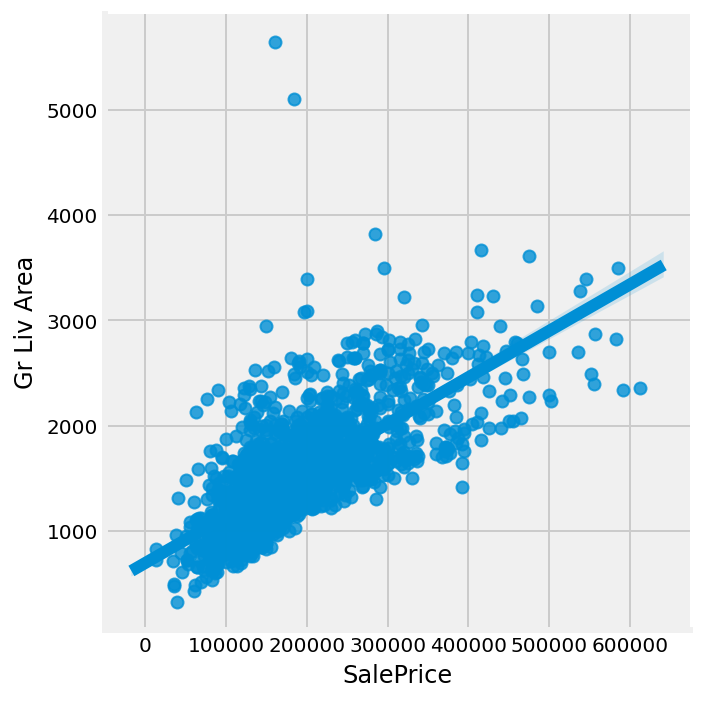

In [113]:
#Comments on the data description revealed certain outliers that may skew the results of modelling
#A plot of Sale Price against general living area reveals 2 outliers that are above 4000 sq feet
sns.lmplot(x='SalePrice',y='Gr Liv Area',data=X);


In [114]:
#The details of the two outliers 
X[X['Gr Liv Area'] > 4000]

,Unnamed: 0,Id,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Central Air_N,Central Air_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Alley_Grvl,Alley_None,Alley_Pave,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed
960,960,1499,908154235,313.0,63887,-1,2,0,10,5,2008,2008,796.0,5,0,5,0,5,5,5644.0,-2,0.0,466.0,6110.0,5,5,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,3,3,2,2008.0,5,2.0,1418.0,0,0,3,214,292,0,0,0,480,3,-3,0,1,2008,160000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0

In [115]:
test[test['Gr Liv Area']>4000]

,Id,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Central Air_N,Central Air_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Alley_Grvl,Alley_None,Alley_Pave,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed
76,2182,908154205,130.0,40094,1,2,0,10,5,2007,2008,762.0,5,0,5,0,5,5,2260,-2,0,878,3138,5,5,3138,1538,0,4676,1,0,3,1,3,1,5,11,3,1,2,2007.0,5,3,884,0,0,3,208,406,0,0,0,0,0,-3,0,10,2007,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


There exists 2 outliers in the training set and 3 outliers in the test set. As the data in the test set should not be edited, the question lies in whether or not to include the outliers in the modelling process. As the outliers consists of huge houses that were sold at a low price, they do have a significant effect on the final model produced, upon a few iterations conducted.

However, I believe that outliers should be removed as their very names imply that they do not fit well in a generalisable model. The negative effects of having the outliers would very likely outweigh the positive effects of the presence of the outliers in predicting the outliers in the test set.

In my own iterations of both keeping and removing the outliers, the model consistently performed better without the outliers, resulting in a better prediction of the non-outlier data, which is the majority of the dataset. 

As such, the following process represents the details of modelling based on this premise.

In [116]:
#Removes the three extreme Price by Area outliers in the training set
X.drop(960,inplace=True)
X.drop(1880,inplace=True)

In [117]:
X.head()

,Unnamed: 0,Id,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Central Air_N,Central Air_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Alley_Grvl,Alley_None,Alley_Pave,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed
0,0,109,533352170,69.0,13517,1,2,0,6,8,1976,2005,289.0,2,0,0,0,-2,5,533.0,-2,0.0,192.0,725.0,5,5,725,754,0,1479,0.0,0.0,2,1,3,1,2,6,3,0,-5,1976.0,2,2.0,475.0,0,0,3,0,44,0,0,0,0,0,-3,0,3,2010,130500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0

## 4.2 Setting predictor and target variables

In [118]:
#I set the target variable as y
y = X['SalePrice']

In [119]:
#I drop the non-predictor variables so that X consists of predictor variables
X.drop(['SalePrice','Unnamed: 0','Id','PID'],axis=1,inplace=True)

In [120]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

#Standardize data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## 4.3 Instantiating and training regression models

At this point, it is finally time to fit our data into models. I chose to use Linear Regression, Lasso, Ridge, and Elastic Net models. The follow lines of codes are steps in which the same process is rendered:
- Instantiate the model and their parameters
- Conduct a K Fold cross validation on them: where I split the training set into K sets of train-test sets, using the cross_val_score function

In [121]:
#I instantiate the various models
lr = LinearRegression()

lasso = LassoCV(n_alphas=200)

ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

enet = ElasticNetCV(l1_ratio=np.linspace(0.001, 1, 50), n_alphas = 100)

In [122]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.8916087981302636

In [123]:
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
lasso_scores.mean()

0.9074259579693974

In [124]:
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
ridge_scores.mean()

0.8988592654142307

In [125]:
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=5)
enet_scores.mean()

0.9073478881313868

Since the Lasso model did the best (by a very small margin over Elastic Net, we shall use the Lasso model to predict the test set.

In [126]:
lasso.fit(X_train_ss, y_train)

LassoCV(n_alphas=200)

In [127]:
lasso.score(X_train_ss, y_train)

0.9268591864118811

In [128]:
lasso.score(X_test_ss, y_test)

0.9086315861392749

## 4.3.1 Lasso model as feature selection tool

One of the notable feature about the Lasso model, is that it causes collinear features and underperforming features to drop out at a stronger rate than the ridge or linear regression models. As the best performing model, it implies the importance of penalizing redundant variables, and running the Lasso model naturally caused the variables to be changed.

## 4.3.2 Interpreting the score

The R^2 score for our lasso model droped from 0.927 for the training set to 0.909 for the test set. This may suggest overfitting, but it is inconclusive at this point as the test score of 0.909 is still decent. What this means is that our model is able to successfully explain over 90% of the variance that is present in the dataset. The dataset, in this case, however, refers to using the X_train_ss/y_train model to predict the X_test_ss/y_test dataset, and in the big picture both the dataset are still in the overall training set, and therefore further training of the model using the entire dataset would still be required should it be chosen.

In [129]:
pred = lasso.predict(X_test_ss)
r2_score(y_test, pred)

0.9086315861392749

In [130]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5
print("The root mean squared error of the model is " + str(rmse))

The root mean squared error of the model is 24295.429921414234


With a RMSE score of 24295, what this means is that our model's prediction is on average off by $24,295 in terms of predicting the property's price. This is pretty good for a preliminary model using regression techniques.

## 4.4 GridSearchCV for hyperparameter

At this point, I wish to opt for alternative models that may outperform the initial best performing model. As such, grid searching for hyperparameters will be employed. Essentially, what this does is that the many iterations of cross validation will occur for the various points set for the hyperparameters alpha and l1_ratio. The alpha in this case refers to the penalty score for huge coefficients, while the l1 ratio refers to the weightage of either the lasso or ridge model (1 for lasso, 0 for ridge). 

There are, however, certain negatives associated with Grid Searching, namely that it requires a significant computational prowess to execute.

In [131]:
#Specify desired values to try for each hyperparameter
param_grid_1 = {
    'alpha':[.1,.3,.5,1,5,10],
    'l1_ratio':[0,.3,.5,.7,1]
}

#Instantiate GridSearchCV with ElasticNet, the parameter values, and 5-fold CV.
gs = GridSearchCV(ElasticNet(),param_grid_1,cv=5,verbose=1,n_jobs=-1)

#Fitting with the scaled X_train and the transformed y_train
gs.fit(X_train_ss,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.4s finished


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.3, 0.5, 1, 5, 10],
                         'l1_ratio': [0, 0.3, 0.5, 0.7, 1]},
             verbose=1)

In [132]:
gs.best_params_

{'alpha': 0.5, 'l1_ratio': 0.7}

In [133]:
gs.best_score_

0.9042495925219345

In [134]:
gs.score(X_test_ss,y_test)

0.9077058998316505

Interestingly, while the best score for the grid search is similar to our lasso model that was the previous best model, the lasso model still outperformed the grid search model slightly. With an l1 ratio of 0.7 as the best score, however, it seems to imply a hybrid model that is a mix of lasso and ridge regression. 

However, as the lasso model performed better, it is possible that the model's tendency to drop ineffective predictor variables is slightly more superior than what the ridge regression model provides. 

As such, the final model that I will work on will be the lasso model.

# 5. Re-training the best model

We want to have a visual representation of how our model is performing. As such a scatter plot diagram is chosen.

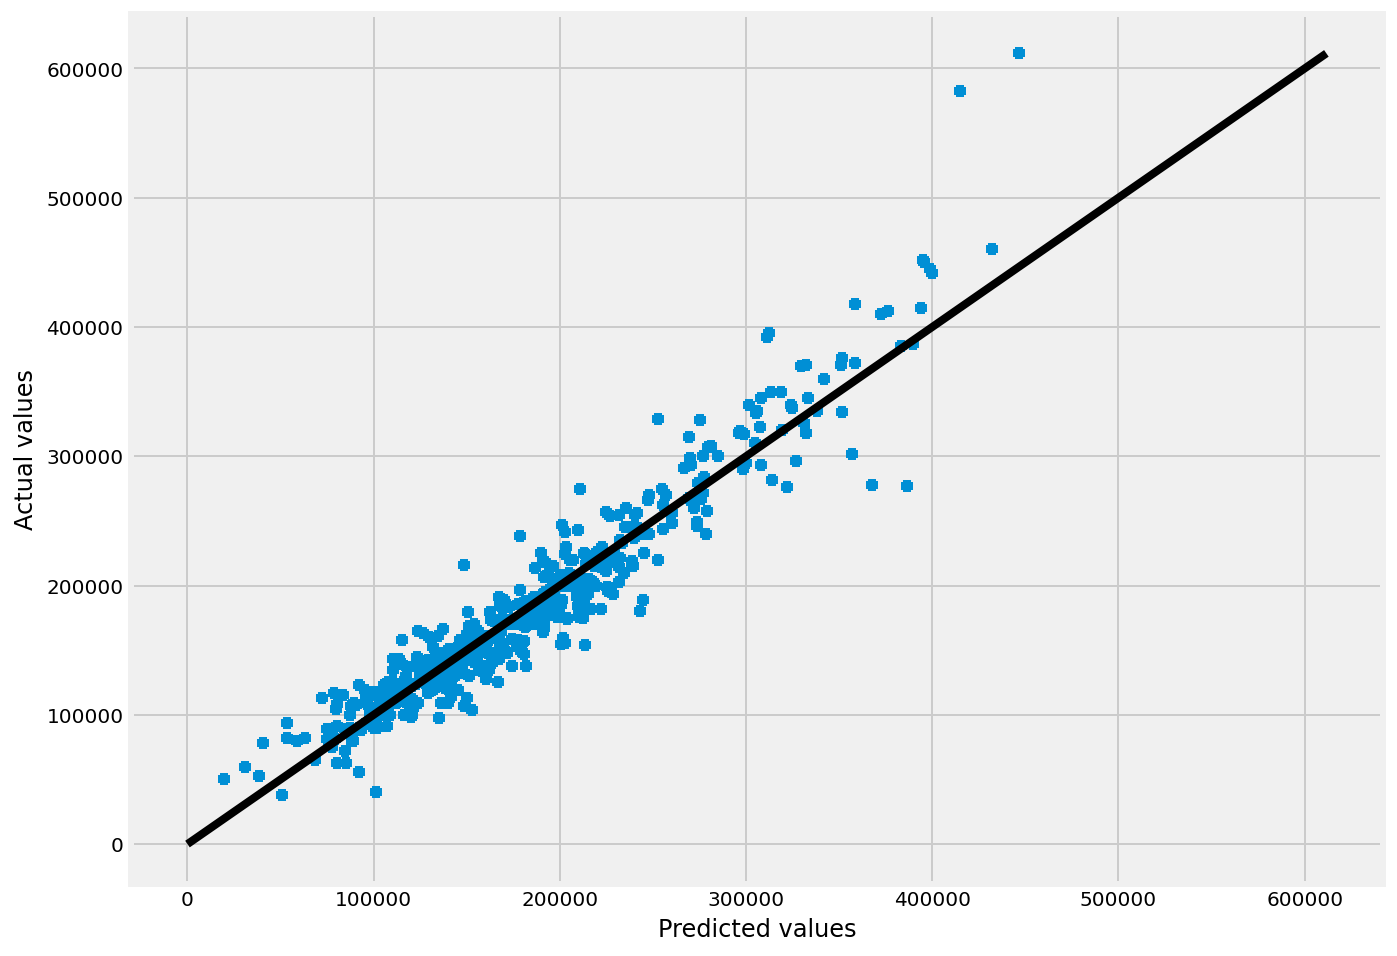

In [135]:
#Generates a list of the model's predictions 
preds2 = lasso.predict(X_test_ss)

#Plots predicted values against actual values in the train/test split.
plt.figure(figsize=(10,8))
plt.scatter(preds2,y_test,marker = '+')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

#Plots x=y line
plt.plot([0,np.max(y_test)],[0,np.max(y_test)], c = 'k');

The line represents the points where the predited values is equal to the actual values. In other words, this line is the visual representation of the predictions of our model. As can be seen, it appears that the accuracy of the model appears to be more precise in the lower end of the dataset. As was previously mentioned, the dataset has more instances of data occuring in the lower values of SalePrice, and as such would likely have a greater impact on the model. 

This would also be part of the reason why the model seems to be less accurate in predicting the higher valued properties.

Now that we have determined the best model is that of lasso, we re-train this model using the entire training data set in order to give it even more data.

In [136]:
#Applies StandardScaler normalization to whole training set
X_ss = ss.fit_transform(X)


#Re-fits the model
lasso.fit(X_ss,y)
#Scores the model (training score)
lasso.score(X_ss,y)

0.9269686434084962

The R2 score of 0.927 on the entire training set means that our model is able to account for 92.7% of the variance in the target variable! This is an impressive score. 

In [137]:
testset = pd.read_csv('../datasets/test_clean.csv')


In [138]:
#Drop the non-numerical columns of the test set
testset.drop(['Unnamed: 0','Id','PID'],axis=1,inplace=True)

In [139]:
testset_ss = ss.transform(testset)

In [140]:
predictions = lasso.predict(testset_ss)

# 6. Submission for Kaggle competition

The kaggle competition has a specific format in which to submit the predicted values of the model, which is done accordingly. I submitted a total of two models, one with the outliers in the model, and one without the outliers in the model. One interesting fact to note is that the Kaggle competition's scoring favors the exclusion of the outliers.

This makes sense, and as explained in the section on outliers, extreme data points(outliers) should not be taken into account in this particular case due to the fact that they negatively impact the model and reduce the accuracy for generalizing the model.

In [141]:
#Create submission csv in proper format
testset['SalePrice'] = predictions
testfile = pd.read_csv('../datasets/test_clean.csv')
testset['Id'] = testfile['Id']
submission = testset[['Id','SalePrice']]
submission.to_csv('../datasets/kaggle_submission2.csv',index=False)

In [142]:
#The kaggle competition necessitates 879 rows of prediction, which is done accordingly.
submission.shape

(879, 2)

# 7. Conclusion, findings and recommendations 

To restate our problem statement:
- the aim of this project is to predict house prices in using regression models.

In the light of that, I believe that the lasso model that was created is useful in predicting house prices in Ames, Iowa. Once the necessary predictor variables are present, we would be able to predict the price of a house in Ames. 






# 7.1 Findings  

One key finding and learning point is the huge difference in the R^2 score when the outliers were removed. There was an improve of over 0.1 in each of the models tested (linear regression, lasso, ridge), from the 0.7 range to the current range (not shown in this notebook). This goes to show the strong influence that an outlier can have on a predictive model, and it would be necessary to pay close attention to such outliers. In this particular case, they were removed. However, there may be models where the outliers are very much necessary to the validity of the model. 

Another finding that we have is that the model does reveal important features that are similar to what a layman would expect: space-related variables were often the driving force behind sale price (intuitively: the larger the house and land, the more is required for it). This model hence confirms and puts a quantitative spin on certain beliefs that are held regarding the factors influencing property pricing. (which is unsurprising) 


# 7.2 Recommendations and next steps 

At its current stage, this model can be used as a very rough estimator of property pricing in Ames. Specifically, should the model be deployed and brought to the market, property agents would be able to engage the model by varying variables on the interface of a handheld device, buyers and sellers would possibly be able to assess the price of their existing house on a rough basis without any valuation experts. 

However, as the model is still in an infancy stage, it would do better to have data collected over a longer timeframe. This would allow more instances of data to be fed into the model, generating better results. Specifically, the current model seems to show greater variance in the higher sale price region, and the feeding of more such data would ensure a more accurate model in that regard.

In terms of the creation of a better model, the method of data collection should also be revised to include a more quantitative response. One of the subjective aspect of this model is the encoding of qualitative responses into quantitative ones, and if the very design of the survey used to evaluate the houses takes this into consideration, it would certainly add weight to the accuracy of the response, and therefore, the model.